In [1]:
from cyvcf2 import VCF
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_union_vcf(files):
    union_variants = set()

    for vcf_file in files:
        vcf_reader = VCF(vcf_file)
        variants_in_file = set()

        for variant in vcf_reader:
            variants_in_file.add((variant.CHROM, variant.POS, variant.REF, variant.ALT[0]))

        union_variants.update(variants_in_file)

    return union_variants


def create_binary_matrix(vcf_files, union_variants):
    num_files = len(vcf_files)
    num_variants = len(union_variants)

    # Initialize a binary matrix with zeros
    binary_matrix = np.zeros((num_files, num_variants), dtype=int)

    for i, vcf_file in enumerate(vcf_files):
        vcf_reader = VCF(vcf_file)
        variants_in_file = [(variant.CHROM, variant.POS, variant.REF, variant.ALT[0]) for variant in vcf_reader]
        for j, variant in enumerate(union_variants):
            # Check if the variant is present in the current VCF file
            if variant in variants_in_file:
                binary_matrix[i, j] = 1

    return binary_matrix

In [3]:

vcf_files = ['./mutect2/norecal-bowtie-mutect-filtered.vcf', './mutect2/recal-bowtie-mutect-filtered.vcf', './mutect2/norecal-bwa-mutect-filtered.vcf', 
             './mutect2/recal-bwa-mutect-filtered.vcf', './strelka/norecal-bowtie-strelka-filtered.vcf', './strelka/recal-bowtie-strelka-filtered.vcf', 
             './strelka/norecal-bwa-strelka-filtered.vcf', './strelka/recal-bwa-strelka-filtered.vcf', 
             './somatic/norecal-bowtie-somaticsniper-filtered.vcf', './somatic/recal-bowtie-somaticsniper-filtered.vcf',
              './somatic/norecal-bwa-somaticsniper-filtered.vcf', './somatic/recal-bwa-somaticsniper-filtered.vcf']

union_variants = get_union_vcf(vcf_files)

binary_matrix = create_binary_matrix(vcf_files, union_variants)

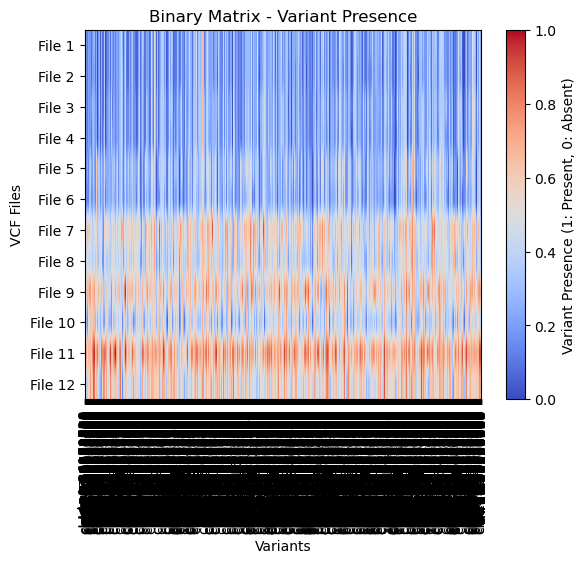

In [4]:
import matplotlib.pyplot as plt

def plot_binary_matrix(binary_matrix, vcf_files, union_variants):
    plt.imshow(binary_matrix, cmap='coolwarm', aspect='auto')
    plt.xlabel('Variants')
    plt.ylabel('VCF Files')
    plt.title('Binary Matrix - Variant Presence')
    plt.xticks(range(len(union_variants)), [f'{variant[0]}:{variant[1]}' for variant in union_variants], rotation=90)
    plt.yticks(range(len(vcf_files)), [f'File {i+1}' for i in range(len(vcf_files))])
    plt.colorbar(label='Variant Presence (1: Present, 0: Absent)')
    plt.show()

# Assuming union_variants and binary_matrix are already obtained
plot_binary_matrix(binary_matrix, vcf_files, union_variants)


In [5]:
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import jaccard

In [6]:
num_files = len(vcf_files)
similarity_matrix = np.zeros((num_files, num_files))

for i in range(0,12):
    for j in range(0,12):
        similarity = jaccard_score(binary_matrix[i], binary_matrix[j])
        similarity_matrix[i][11 - j] = similarity

print(similarity_matrix)

[[0.31395349 0.26236489 0.3756962  0.29454685 0.44089776 0.38981563
  0.59433259 0.54545455 0.86895911 0.8677686  0.96590909 1.        ]
 [0.31792376 0.26512397 0.38232271 0.29864078 0.43963783 0.38770999
  0.6089939  0.55670816 0.88235294 0.85489834 1.         0.96590909]
 [0.32121923 0.26981072 0.35625    0.28276117 0.4500969  0.39982877
  0.56673655 0.52399232 0.95110701 1.         0.85489834 0.8677686 ]
 [0.32727273 0.27428756 0.36222006 0.28661946 0.45303327 0.4013811
  0.57823613 0.53381014 1.         0.95110701 0.88235294 0.86895911]
 [0.42380204 0.35330113 0.50097943 0.39969891 0.59694129 0.5304878
  0.88905775 1.         0.53381014 0.52399232 0.55670816 0.54545455]
 [0.3923292  0.32355816 0.47058824 0.36550935 0.54540918 0.47982456
  1.         0.88905775 0.57823613 0.56673655 0.6089939  0.59433259]
 [0.42861665 0.37567568 0.41027471 0.35979929 0.85978359 1.
  0.47982456 0.5304878  0.4013811  0.39982877 0.38770999 0.38981563]
 [0.44179714 0.37632256 0.42868247 0.36163522 1.   

In [7]:
num_files = len(vcf_files)
distance_matrix = np.zeros((num_files, num_files))

for i in range(0,12):
    for j in range(0,12):
        distance = jaccard(binary_matrix[i], binary_matrix[j])
        distance_matrix[i][11 - j] = distance

print(distance_matrix)

[[0.68604651 0.73763511 0.6243038  0.70545315 0.55910224 0.61018437
  0.40566741 0.45454545 0.13104089 0.1322314  0.03409091 0.        ]
 [0.68207624 0.73487603 0.61767729 0.70135922 0.56036217 0.61229001
  0.3910061  0.44329184 0.11764706 0.14510166 0.         0.03409091]
 [0.67878077 0.73018928 0.64375    0.71723883 0.5499031  0.60017123
  0.43326345 0.47600768 0.04889299 0.         0.14510166 0.1322314 ]
 [0.67272727 0.72571244 0.63777994 0.71338054 0.54696673 0.5986189
  0.42176387 0.46618986 0.         0.04889299 0.11764706 0.13104089]
 [0.57619796 0.64669887 0.49902057 0.60030109 0.40305871 0.4695122
  0.11094225 0.         0.46618986 0.47600768 0.44329184 0.45454545]
 [0.6076708  0.67644184 0.52941176 0.63449065 0.45459082 0.52017544
  0.         0.11094225 0.42176387 0.43326345 0.3910061  0.40566741]
 [0.57138335 0.62432432 0.58972529 0.64020071 0.14021641 0.
  0.52017544 0.4695122  0.5986189  0.60017123 0.61229001 0.61018437]
 [0.55820286 0.62367744 0.57131753 0.63836478 0.   

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

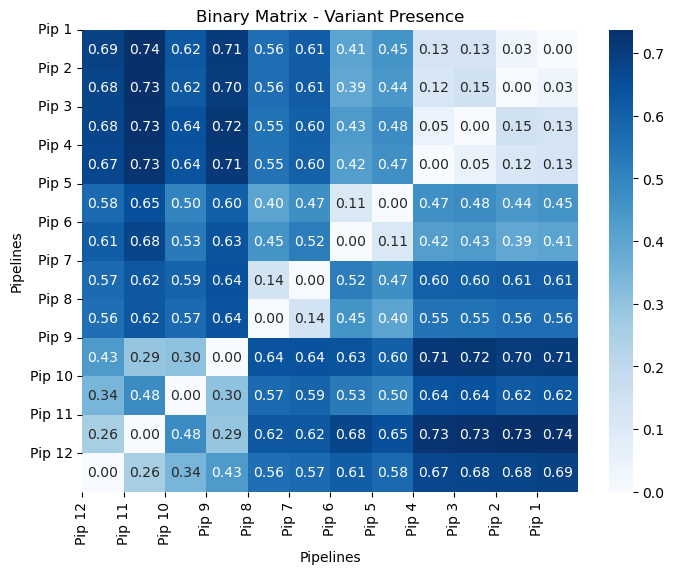

In [9]:

plt.figure(figsize=(8, 6))
plt.title('Binary Matrix - Variant Presence')
sns.heatmap(distance_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Pipelines')
plt.ylabel('Pipelines')
plt.xticks(ticks=range(distance_matrix.shape[1]), labels=[f'Pip {12-i}' for i in range(distance_matrix.shape[1])], rotation=90)
plt.yticks(ticks=range(distance_matrix.shape[0]), labels=[f'Pip {i+1}' for i in range(distance_matrix.shape[0])], rotation=0)
plt.show()

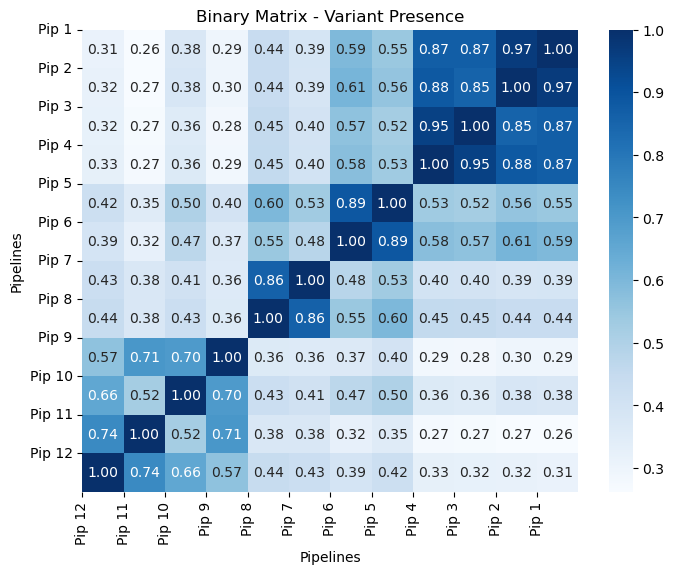

In [10]:
plt.figure(figsize=(8, 6))
plt.title('Binary Matrix - Variant Presence')
sns.heatmap(similarity_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Pipelines')
plt.ylabel('Pipelines')
plt.xticks(ticks=range(similarity_matrix.shape[1]), labels=[f'Pip {12-i}' for i in range(distance_matrix.shape[1])], rotation=90)
plt.yticks(ticks=range(similarity_matrix.shape[0]), labels=[f'Pip {i+1}' for i in range(distance_matrix.shape[0])], rotation=0)
plt.show()

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

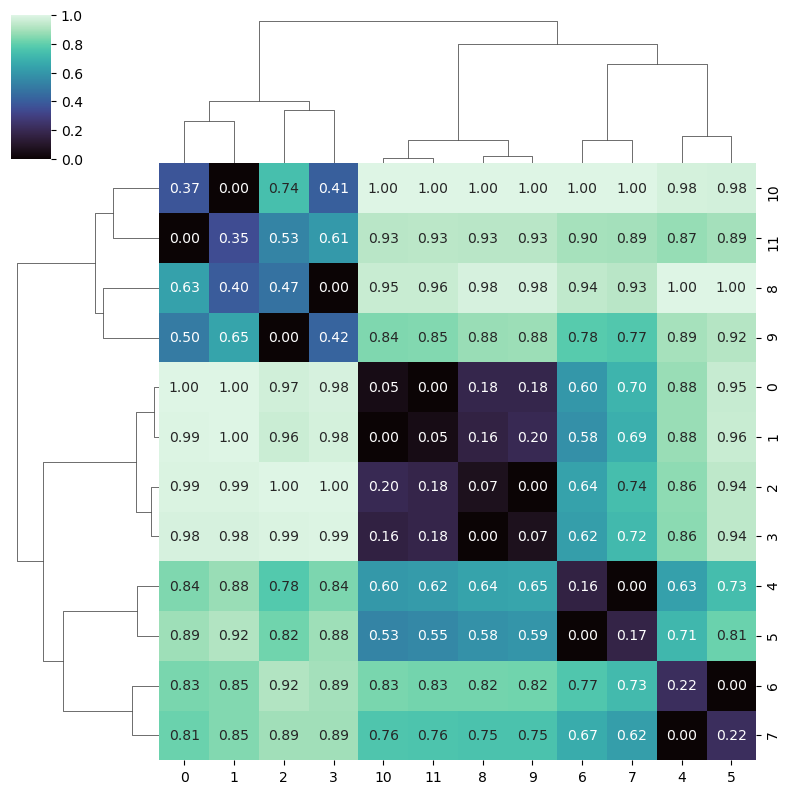

In [12]:

sns.clustermap(distance_matrix, annot=True, standard_scale=1, fmt='.2f', cmap='mako',vmin=0, vmax=1, figsize=(8,8))
plt.show()

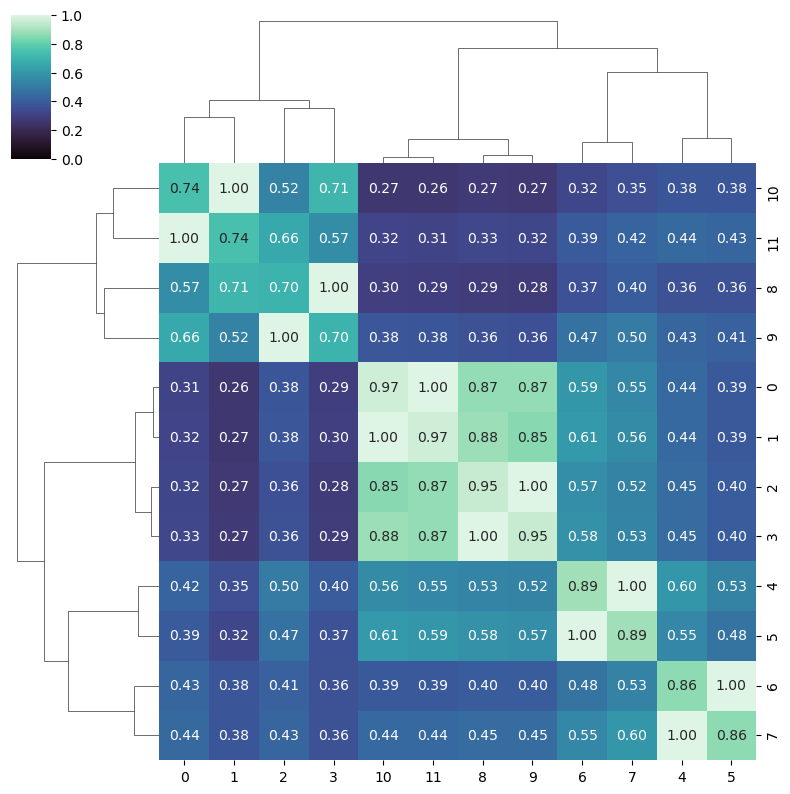

In [13]:
sns.clustermap(similarity_matrix, annot=True, fmt='.2f', cmap='mako',vmin=0, vmax=1, figsize=(8,8))

plt.show()

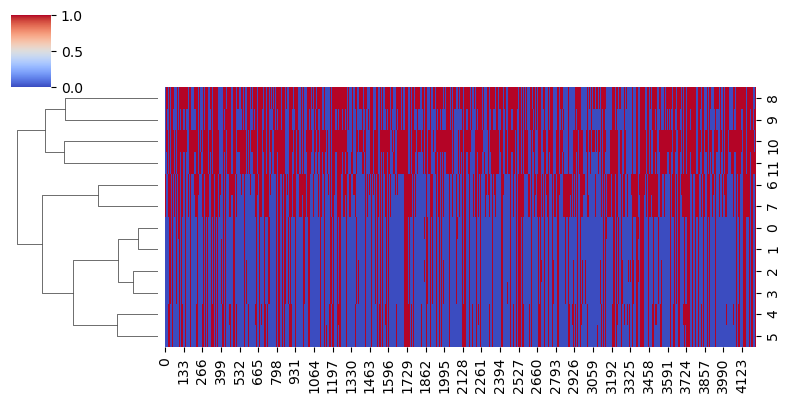

In [14]:
sns.clustermap(binary_matrix, col_cluster=False, fmt='.2f', cmap='coolwarm', figsize=(8,4))
plt.show()

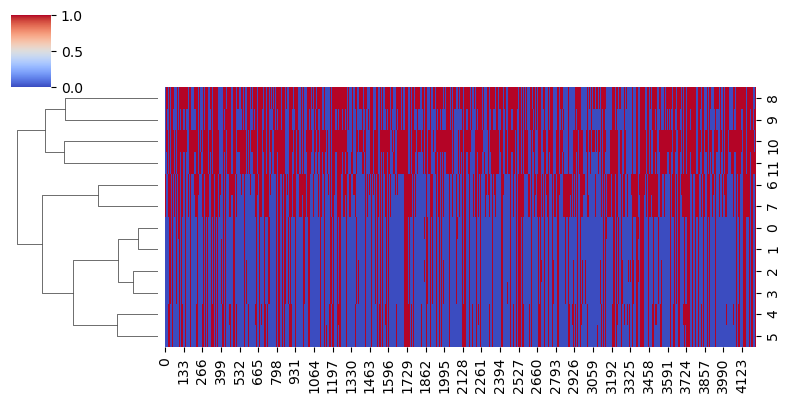

In [15]:
sns.clustermap(binary_matrix, col_cluster=False, fmt='.2f', cmap='coolwarm', figsize=(8,4))
plt.show()

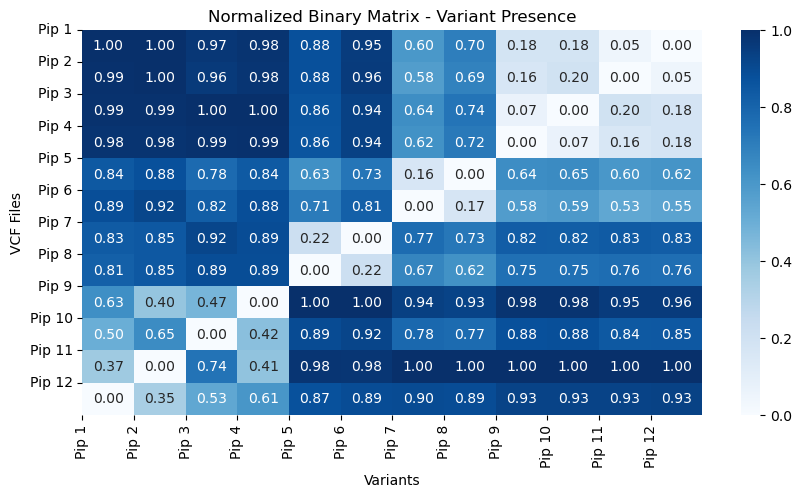

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming `distance_matrix` is your binary matrix and `vcf_files` is your list of files

# Normalize the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
normalized_distance_matrix = scaler.fit_transform(distance_matrix)

plt.figure(figsize=(10, 5))
plt.title('Normalized Binary Matrix - Variant Presence')
sns.heatmap(normalized_distance_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Variants')
plt.ylabel('VCF Files')
plt.xticks(ticks=range(normalized_distance_matrix.shape[1]), labels=[f'Pip {i+1}' for i in range(normalized_distance_matrix.shape[1])], rotation=90)
plt.yticks(ticks=range(normalized_distance_matrix.shape[0]), labels=[f'Pip {i+1}' for i in range(normalized_distance_matrix.shape[0])], rotation=0)
plt.show()
